In [1]:
from skimage import data , feature , transform
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.datasets import fetch_lfw_people

In [2]:
total_human_faces = fetch_lfw_people()

In [6]:
dir(total_human_faces)

['DESCR', 'data', 'images', 'target', 'target_names']

In [8]:
total_human_faces.data.shape

(13233, 2914)

In [3]:
len(total_human_faces)

5

In [4]:
total_human_faces

{'data': array([[ 34.      ,  29.333334,  22.333334, ...,  14.666667,  16.      ,
          14.      ],
        [158.      , 160.66667 , 169.66667 , ..., 138.66667 , 135.33333 ,
         130.33333 ],
        [ 77.      ,  81.333336,  88.      , ..., 192.      , 145.33333 ,
          66.333336],
        ...,
        [ 38.      ,  41.666668,  55.333332, ...,  66.      ,  63.666668,
          54.333332],
        [ 16.666666,  24.333334,  60.333332, ..., 219.      , 143.33333 ,
          69.333336],
        [ 58.333332,  48.      ,  20.      , ..., 116.      , 106.333336,
         143.33333 ]], dtype=float32),
 'images': array([[[ 34.      ,  29.333334,  22.333334, ...,  20.      ,
           25.666666,  30.666666],
         [ 37.333332,  32.      ,  25.333334, ...,  21.      ,
           26.666666,  32.      ],
         [ 33.333332,  32.333332,  40.333332, ...,  23.666666,
           28.      ,  35.666668],
         ...,
         [166.      ,  97.      ,  44.333332, ...,   9.666667,
     

In [9]:
a = [10,20,30]
a[:1]

[10]

In [10]:
positive_images = total_human_faces.images[:10000]

In [11]:
len(positive_images)

10000

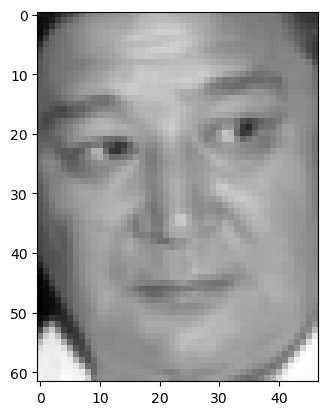

In [14]:
plt.imshow(positive_images[1000],cmap='gray')

## we will create negative images also 

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
from skimage import data , feature , transform
from itertools import chain
from sklearn.datasets import fetch_lfw_people
from sklearn.feature_extraction.image import PatchExtractor

In [18]:
a = ['moon' , 'text' , 'coins']


In [19]:
negative_samples = [(getattr(data , i)()) for i in a]


In [20]:
negative_samples

[array([[116, 116, 122, ...,  93,  96,  96],
        [116, 116, 122, ...,  93,  96,  96],
        [116, 116, 122, ...,  93,  96,  96],
        ...,
        [109, 109, 112, ..., 117, 116, 116],
        [114, 114, 113, ..., 118, 118, 118],
        [114, 114, 113, ..., 118, 118, 118]], dtype=uint8),
 array([[ 91,  94,  99, ..., 135, 135, 134],
        [ 99, 104, 104, ..., 141, 141, 139],
        [105, 109, 109, ..., 145, 142, 141],
        ...,
        [146, 146, 141, ..., 142, 142, 142],
        [144, 140, 141, ..., 146, 141, 136],
        [145, 136, 143, ..., 143, 134, 126]], dtype=uint8),
 array([[ 47, 123, 133, ...,  14,   3,  12],
        [ 93, 144, 145, ...,  12,   7,   7],
        [126, 147, 143, ...,   2,  13,   3],
        ...,
        [ 81,  79,  74, ...,   6,   4,   7],
        [ 88,  82,  74, ...,   5,   7,   8],
        [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)]

In [21]:
negative_samples[0]

array([[116, 116, 122, ...,  93,  96,  96],
       [116, 116, 122, ...,  93,  96,  96],
       [116, 116, 122, ...,  93,  96,  96],
       ...,
       [109, 109, 112, ..., 117, 116, 116],
       [114, 114, 113, ..., 118, 118, 118],
       [114, 114, 113, ..., 118, 118, 118]], dtype=uint8)

In [22]:
len(negative_samples)

3

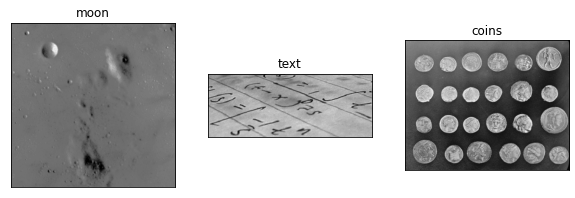

In [13]:
plt.figure(figsize = (10,10))
for i in range(len(negative_samples)):
    plt.subplot(1,3,i+1)
    plt.title(a[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(negative_samples[i],cmap = 'gray')

    

In [14]:
# so now this three different images we can transform into multiple angles and repeat them to get big data 

In [25]:
positive_images

array([[[ 34.      ,  29.333334,  22.333334, ...,  20.      ,
          25.666666,  30.666666],
        [ 37.333332,  32.      ,  25.333334, ...,  21.      ,
          26.666666,  32.      ],
        [ 33.333332,  32.333332,  40.333332, ...,  23.666666,
          28.      ,  35.666668],
        ...,
        [166.      ,  97.      ,  44.333332, ...,   9.666667,
          14.333333,  12.333333],
        [ 64.      ,  38.666668,  30.      , ...,  12.666667,
          16.      ,  14.      ],
        [ 30.666666,  29.      ,  26.333334, ...,  14.666667,
          16.      ,  14.      ]],

       [[158.      , 160.66667 , 169.66667 , ...,  74.333336,
          28.      ,  15.666667],
        [156.      , 155.33333 , 163.33333 , ...,  83.      ,
          25.666666,  14.      ],
        [146.66667 , 143.66667 , 144.66667 , ...,  82.333336,
          26.      ,  14.666667],
        ...,
        [118.666664, 120.      , 170.      , ..., 131.33333 ,
         127.333336, 126.      ],
        [125

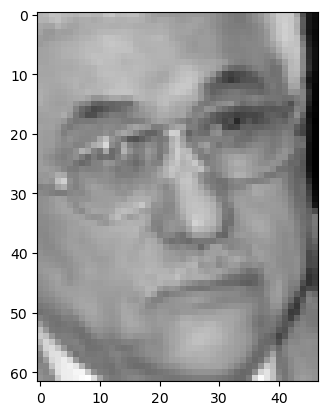

In [28]:
plt.imshow(positive_images[1],cmap = 'gray')

In [29]:
positive_images[1].shape

(62, 47)

In [42]:
def fun(image,total_images = 1000 , patch_size = positive_images[0].shape):
    extract = PatchExtractor(patch_size=patch_size , max_patches=total_images , random_state=42)
    sol = extract.transform((image[np.newaxis]))
    return sol

In [43]:
negative_images = np.vstack([fun(j , 1000) for j in negative_samples])

In [44]:
negative_images[0]

array([[ 56.,  69.,  69., ..., 112., 112., 112.],
       [ 56.,  69.,  69., ..., 112., 112., 112.],
       [ 47.,  68.,  68., ..., 113., 111., 111.],
       ...,
       [107., 112., 112., ..., 117., 118., 118.],
       [116., 117., 117., ..., 116., 118., 118.],
       [116., 117., 117., ..., 116., 118., 118.]])

In [45]:
len(negative_images)

3000

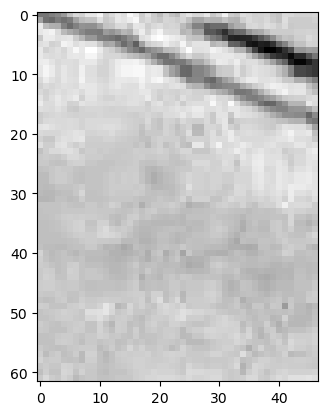

In [48]:
plt.imshow(negative_images[1000],cmap = 'gray')

In [49]:
len(negative_images)

3000

In [50]:
### we need to create an training and testing data 

In [51]:
X_train = np.array([feature.hog(i) for i in chain(positive_images , negative_images)])

In [52]:
len(X_train)

13000

In [53]:
X_train.shape

(13000, 1215)

In [54]:
X_train.shape[0]

13000

In [55]:
y_train = np.zeros(X_train.shape[0])

In [56]:
y_train[:10]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
len(y_train)

13000

In [58]:
positive_images.shape[0]

10000

In [59]:
y_train[:positive_images.shape[0]] = 1

In [62]:
y_train[10001]

0.0

In [63]:
from sklearn.svm import LinearSVC

In [64]:
reg = LinearSVC()

In [65]:
reg.fit(X_train,y_train)

LinearSVC()

In [66]:
import cv2

In [67]:
positive_images[0].shape

(62, 47)

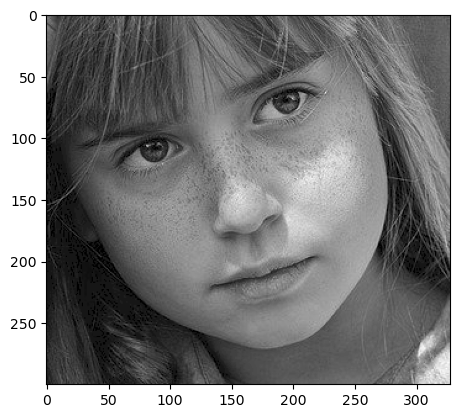

In [90]:
test_img = cv2.imread('./girl_face.png',0)
plt.imshow(test_img,cmap='gray')

In [91]:
test_img.shape

(300, 328)

In [92]:
positive_images[0].shape

(62, 47)

In [93]:
test_img = transform.resize(test_img,positive_images[0].shape)

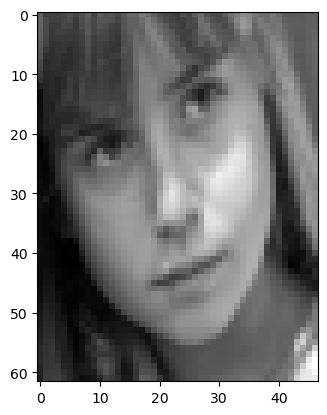

In [95]:
plt.imshow(test_img,cmap='gray')

In [97]:
test_hog = feature.hog(test_img)

In [98]:
test_hog

array([0.12985477, 0.11153121, 0.04379233, ..., 0.00964974, 0.01575372,
       0.03808466])

In [99]:
len(test_hog)

1215

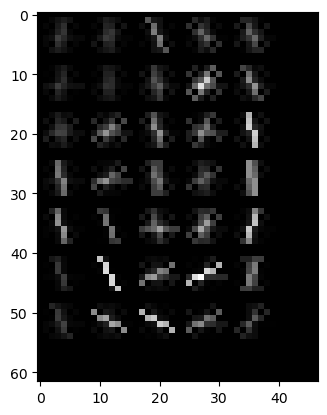

In [80]:
plt.imshow(ho_img,cmap = 'gray')

In [100]:
test_hog = test_hog.reshape(1,-1)

In [101]:
pred = reg.predict(test_hog)

In [102]:
pred

array([1.])

In [103]:
def fun(path):
    k = cv2.imread(path , 0)
    test_img = transform.resize(k,positive_images[0].shape)
    plt.imshow(test_img,cmap = 'gray')
    plt.show()
    test_hog = np.array([feature.hog(test_img)])
    return reg.predict(test_hog)
    
    
   

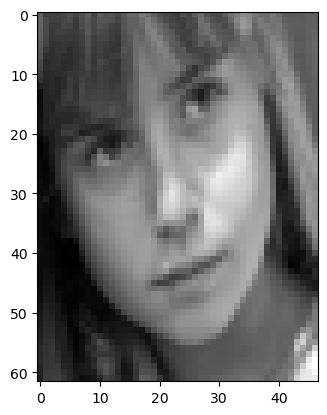

array([1.])

In [105]:
fun('./girl_face.png')

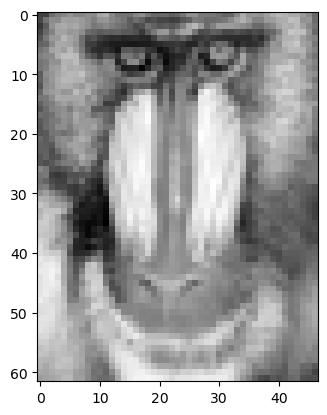

array([0.])

In [106]:
fun('./../images/mandril_gray.tif')

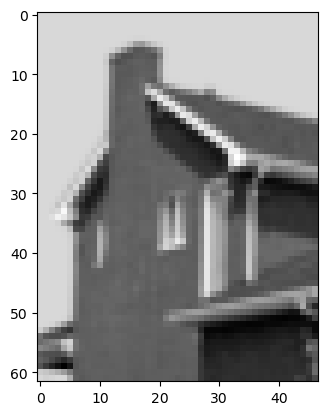

array([0.])

In [107]:
fun('./../images/house.tif')

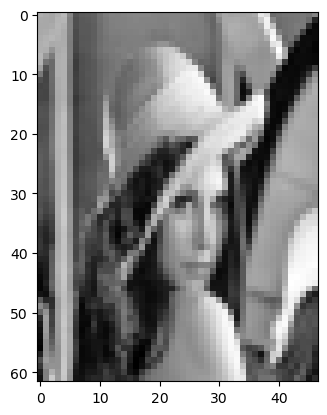

array([0.])

In [108]:
fun('./../images/lena_gray_256.tif')

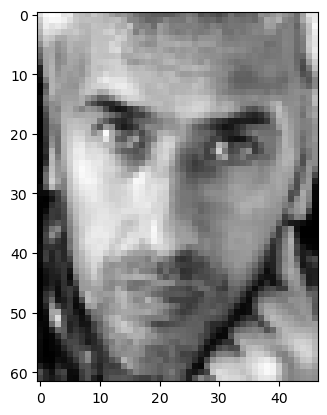

array([1.])

In [109]:
fun('./male_face.png')